# Finding the Best Neighborhood in Pittsburgh

## Introduction:

We will analyze WPRDC datasets on the different neighborhoods in Pittsburgh to find the "best" neighborhood.

*So how do we decide what the best neighborhood is?*
We define the "best" neighborhood in Pittsburgh as the safest one measured by three different metrics: crime, speeding, and fire incidents.

Our datasets:

Crime: https://data.wprdc.org/dataset/arrest-data

Traffic: https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh

Fire Incidents: https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh

## Tianyi's Dataset: Crime Rates

In [1]:
import pandas as pd

In [2]:
police_arrests = pd.read_csv("police-arrests.csv")
police_arrests.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [3]:
neighborhood_arrests = police_arrests["INCIDENTNEIGHBORHOOD"]
num_neighborhood_arrests = neighborhood_arrests.value_counts().to_frame()
num_neighborhood_arrests = num_neighborhood_arrests.rename(columns = {"INCIDENTNEIGHBORHOOD": "Number of Arrests"})

In [4]:
num_neighborhood_arrests = num_neighborhood_arrests.drop(["Outside City", "Outside County", "Outside State", "Mt. Oliver Boro"])

num_neighborhood_arrests.loc["Mount Oliver"] += num_neighborhood_arrests.loc["Mt. Oliver Neighborhood"]
num_neighborhood_arrests = num_neighborhood_arrests.drop(["Mt. Oliver Neighborhood"])

num_neighborhood_arrests.loc["Troy Hill"] += num_neighborhood_arrests.loc["Troy Hill-Herrs Island"]
num_neighborhood_arrests = num_neighborhood_arrests.drop(["Troy Hill-Herrs Island"])

num_neighborhood_arrests.loc["Central Northside"] += num_neighborhood_arrests.loc["Central North Side"]
num_neighborhood_arrests = num_neighborhood_arrests.drop(["Central North Side"])

num_neighborhood_arrests = num_neighborhood_arrests.sort_values(by=["Number of Arrests"])

<AxesSubplot:>

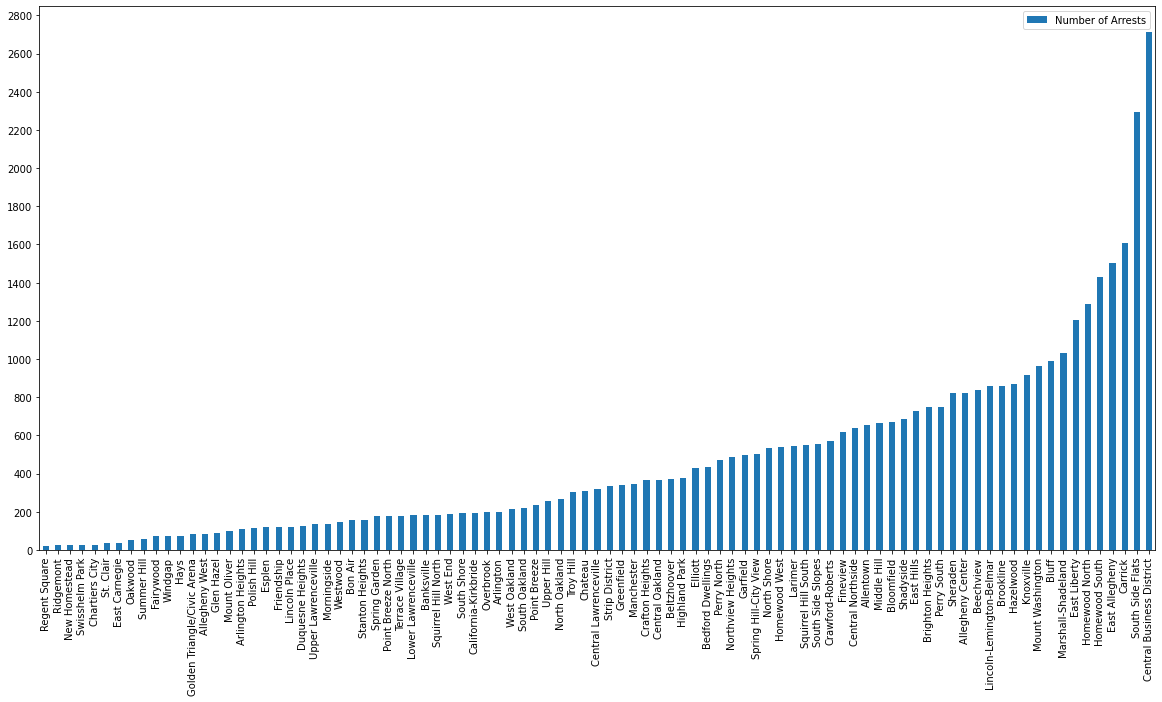

In [5]:
num_neighborhood_arrests.plot.bar(figsize=(20,10), yticks=([i for i in range(0, 3000, 200)]))

In [6]:
least_crime = num_neighborhood_arrests.head()

<AxesSubplot:>

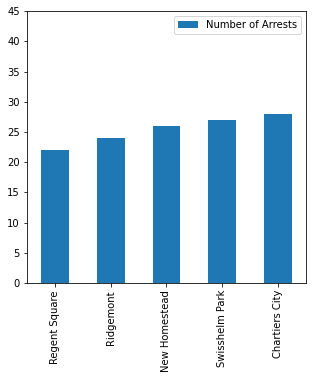

In [7]:
least_crime.plot.bar(figsize=(5,5), yticks=([i for i in range(0, 50, 5)]))

In [8]:
most_crime = num_neighborhood_arrests.iloc[::-1].head()

<AxesSubplot:>

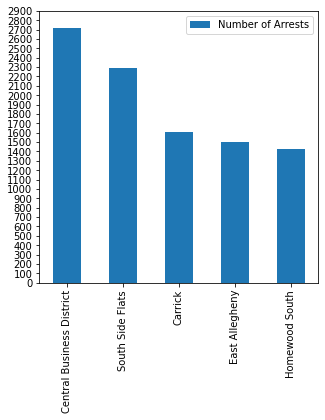

In [9]:
most_crime.plot.bar(figsize=(5,5), yticks=([i for i in range(0, 3000, 100)]))

## Brian's Datasets: Traffic & Fire Incidents

**Traffic:**

In [10]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
traffic = pd.read_csv('traffic_data.csv')

In [12]:
traffic.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7,6,42003060500,6,6,2,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7,9,42003090200,2,9,2,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2,28,42003563000,5,28,6,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5,14,42003140800,3,14,4,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1,26,42003260200,1,26,1,1-15


In [13]:
#organize the dataframe to show speeding rates by neighborhood
by_neighborhood = pd.pivot_table(traffic,values='percent_over_limit',index='neighborhood')
by_neighborhood

,percent_over_limit
neighborhood,
Allegheny Center,65.000000
Allegheny West,11.000000
Arlington,61.500000
Beechview,59.000000
Bloomfield,26.500000
Bluff,14.666667
Brookline,41.000000
Carrick,13.000000
Central Business District,6.000000


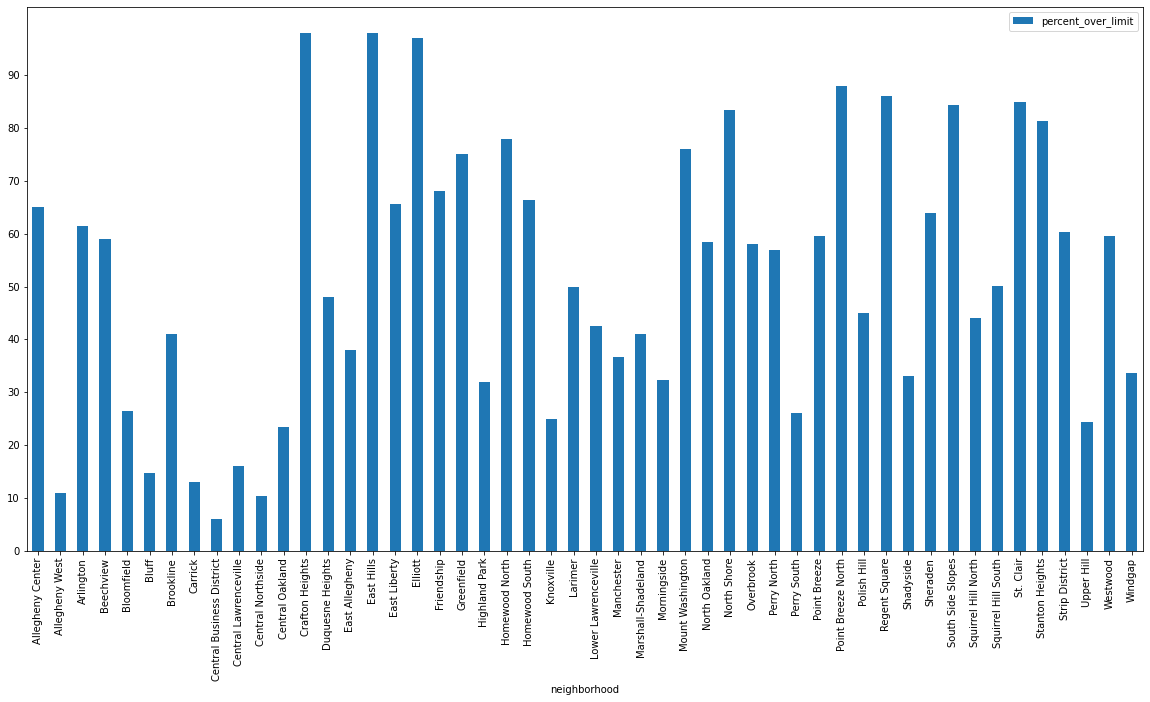

In [14]:
#plot data
by_neighborhood.plot.bar(figsize=(20,10), yticks=([i for i in range(0, 100, 10)]))
plt.show()

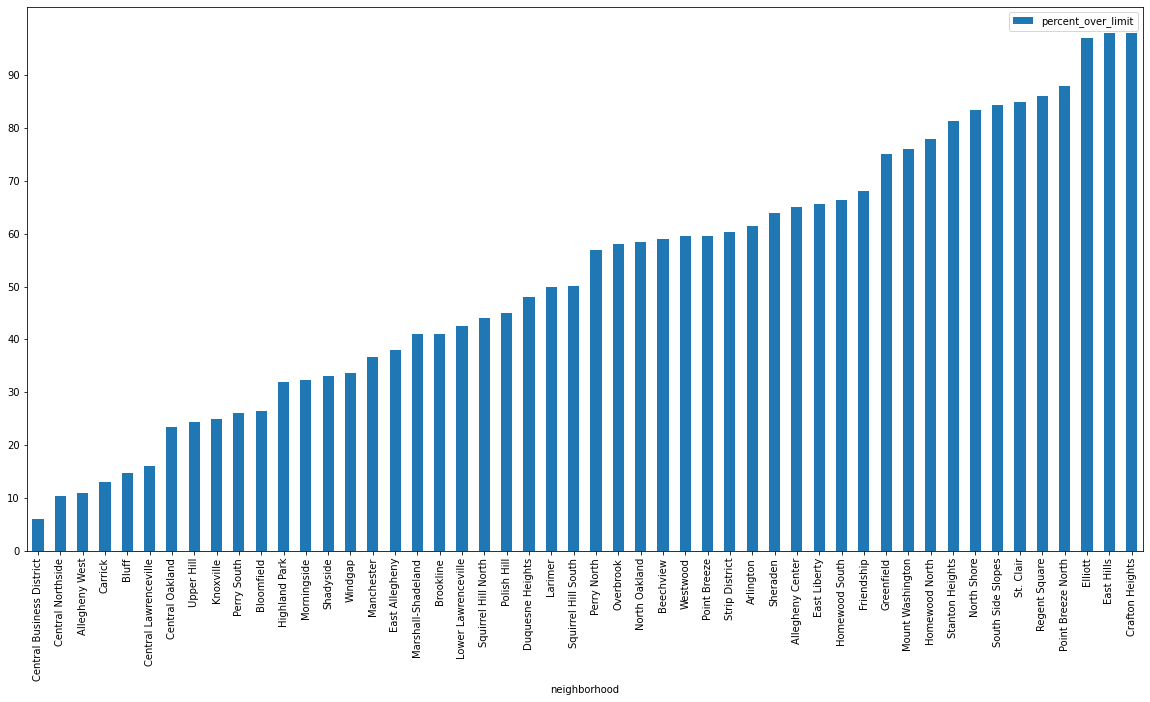

In [15]:
#sort the data to get a clearer picture
by_neighborhood.sort_values(by=['percent_over_limit'], inplace=True)
by_neighborhood.plot.bar(figsize=(20,10), yticks=([i for i in range(0, 100, 10)]), )
plt.show()

In [16]:
#find the neighborhood with the smallest speeding rate
by_neighborhood.loc[by_neighborhood['percent_over_limit'] == int(by_neighborhood['percent_over_limit'].min())]

,percent_over_limit
neighborhood,
Central Business District,6.0


**Fire Incidents:**

In [17]:
fire = pd.read_csv('fire_incidents.csv')
fire.head()

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


In [18]:
#clean up the data
fire = fire[['neighborhood', 'type_description']]
fire.head(10)

,neighborhood,type_description
0,NaN,Building fire
1,NaN,Building fire
2,NaN,Passenger vehicle fire
3,Fineview,Passenger vehicle fire
4,Fairywood,Building fire
5,South Side Flats,"Outside rubbish fire, Other"
6,Allegheny Center,"Cooking fire, confined to container"
7,Lincoln-Lemington-Belmar,Building fire
8,Carrick,Building fire
9,Beechview,Passenger vehicle fire


In [19]:
#drop all rows without a specified neighborhood
fire.dropna(inplace=True)
fire.reset_index(drop=True, inplace=True)
fire.head(10)

,neighborhood,type_description
0,Fineview,Passenger vehicle fire
1,Fairywood,Building fire
2,South Side Flats,"Outside rubbish fire, Other"
3,Allegheny Center,"Cooking fire, confined to container"
4,Lincoln-Lemington-Belmar,Building fire
5,Carrick,Building fire
6,Beechview,Passenger vehicle fire
7,Allentown,"Outside rubbish, trash or waste fire"
8,Beltzhoover,"Trash or rubbish fire, contained"
9,Crafton Heights,Building fire


In [ ]:
#create a dictionary to store how many times a certain fire type occurs in each neighborhood
d = dict()
for i in range(fire.shape[0]):
    neighborhood = fire.iloc[i]['neighborhood']
    firetype = fire.iloc[i]['type_description']
    if neighborhood not in d:
        d[neighborhood] = {firetype: 0}
    elif firetype not in d[neighborhood]:
        d[neighborhood][firetype] = 0
    d[neighborhood][firetype] += 1

In [ ]:
#create new dataframe with the dictionary
fire_count = pd.DataFrame.from_dict(d)
fire_count.fillna(0, inplace=True)
fire_count = fire_count.transpose()
fire_count.head()

In [ ]:
#drop minor fire incident types
fire_count.drop(['Outside rubbish fire, Other',
 'Outside gas or vapor combustion explosion',
 'Cooking fire, confined to container',
 'Outside rubbish, trash or waste fire',
 'Dumpster or other outside trash receptacle fire',
 'Fuel burner/boiler malfunction, fire confined',
 'Mobile property (vehicle) fire, Other',
 'Fires in structure other than in a building',
 'Outside stationary compactor/compacted trash fire',
 'Natural vegetation fire, Other',
 'Road freight or transport vehicle fire',
 'Fire, Other',
 'Special outside fire, Other',
 'Self-propelled motor home or recreational vehicle',
 'Outside storage fire',
 'Rail vehicle fire',
 'Trash or rubbish fire, contained',
 'Water vehicle fire',
 'Brush or brush-and-grass mixture fire',
 'Grass fire',
 'Commercial Compactor fire, confined to rubbish',
 'Fire in portable building, fixed location',
 'Construction or demolition landfill fire',
 'Outside equipment fire',
 'Off-road vehicle or heavy equipment fire',
 'Outside mailbox fire',
 'Chimney or flue fire, confined to chimney or flue',
 'Incinerator overload or malfunction, fire confined',
 'Garbage dump or sanitary landfill fire',
 'Camper or recreational vehicle (RV) fire',
 'Fire in motor home, camper, recreational vehicle',
 'Cultivated grain or crop fire',
 'Fire in mobile prop used as a fixed struc, Other',
 'Fire in mobile home used as fixed residence',
 'Cultivated trees or nursery stock fire',
 'Cultivated vegetation, crop fire, Other'
                ], axis=1, inplace=True)

In [ ]:
#add a 'total' column
fire_count['total'] = fire_count.sum(axis=1)
fire_count.sort_values(by='total', inplace=True)
fire_count.head()

**Plotting the Data**

In [ ]:
#simple total fire incidents per neighborhood
fire_count['total'].plot.bar(figsize=(20,10), yticks=([i for i in range(0, int(fire_count['total'].max()), 10)]))
plt.show()

In [ ]:
#graphing the major fire incident types by neighborhood

fire_count.plot.bar(figsize=(20,30), subplots=True, sharex=False)
plt.tight_layout()

## Final Analysis:

There are some clear discrepancies between the results of the three datasets. For example, Regent Square is the best neighborhood when considering crime data and one of the best neighborhoods with the fire incident data, but it has one of the worst speeding rates in the traffic data.

We will have to create a metric that aggregates the data from the three datasets to make a final decision.

In [ ]:
#create new dataframe for the aggregate metric
combined = pd.DataFrame()

In [ ]:
#add the list of neighborhoods to the dataframe
neighborhoods = by_neighborhood.drop('percent_over_limit', axis=1)
neighborhoods['score'] = -1

Our aggregate metric will be the sum of the values of the three datasets for each neighborhood adjusted out of 100.

The smaller the score, the safer the neighborhood.

In [ ]:
#iterate through each neighborhood and calculate their scores
max_crime = int(num_neighborhood_arrests.max())
max_fire = int(fire_count['total'].max())
fire_neighborhoods = list(fire_count.index.values)
crime_neighborhoods = list(num_neighborhood_arrests.index.values)
for n in list(neighborhoods.index.values):
    if n in fire_neighborhoods and n in crime_neighborhoods:
        score = float(by_neighborhood.loc[n])
        score += float(num_neighborhood_arrests.loc[n])*100/max_crime
        score += float(fire_count['total'].loc[n])*100/max_fire
        neighborhoods.loc[n] = score
neighborhoods.head()

In [ ]:
#sort dataframe
neighborhoods.sort_values(by=['score'], inplace=True)
neighborhoods.head()

**Plotting results:**

In [ ]:
#plotting data
neighborhoods.plot.bar(figsize=(20,10))
plt.show()

## Our Conclusions:

**Brian:**

My personal favorite neighborhood is North Oakland, mostly because I live there.
The best part about North Oakland is of course Pitt's campus, especially Cathy.
Judging solely from personal experience, North Oakland seems like a safe place, and I would assume that it would rank highly before doing any formal analysis.
After going through the final analysis in this project, it surprised me that North Oakland proved to be a little below average.
Central Oakland, which is right next to it, did do pretty well with the eighth best score.
However the best scoring neighborhood by our metric is Allegheny West.
I have no personal experience being in Allegheny West, but I can now assume that it is a safe neighborhood.

**Tianyi:**

Based on our analysis, it appears that Allegheny West is the best neighborhood based on our three criteria of crime, traffic, and fires.
However, I personally haven't been to Allegheny West, so I can't attest to its safety.
I can only assume based on our results that it's pretty safe, at least in comparison to the other neighborhoods of Pittsburgh.
It ranks pretty highly for crime and speeding, but not as highly for fires.
Although it doesn't come at the top for all three categories, it places highest overall when all categories are considered, which makes it a good compromise.